In [1]:
from astropy.io import ascii
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy.table import Table, hstack, unique
import astropy.units as u
import numpy
import matplotlib.pyplot as plt

In [2]:
brostable = ascii.read("../catalog/fBROS_PS1_itohryosuke.csv",format="csv")
faketable = ascii.read("../catalog/utsumi/fake_utsumi_PS1_itohryosuke_2.csv",format="csv")
randtable = ascii.read("../catalog/fake_PS1_nearby_nc_itohryosuke.csv",format="csv")[:1000000]

In [3]:
brostable

id,ra,dec,objid,distance,primaryDetection,gra,gdec,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,rra,rdec,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,ira,idec,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr
str17,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BROS_J0000.0-2801,0.00913008442571,-28.0224709357,74370000125111474,0.201786616101,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.01251115,-28.02401753,-999.0,4.89777994156,-999.0,0.0275190006942,-999.0,-999.0,0.01251068,-28.02402018,24.2889995575,0.596993982792,25.6366996765,0.0334560014307,-999.0,-999.0
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000115388730,0.177264440756,1,0.01153908,-24.46799118,23.5648994446,0.262477993965,23.3694000244,0.0208889991045,-999.0,-999.0,0.01154047,-24.46799268,25.6648006439,2.54914999008,23.3528995514,0.0206419993192,-999.0,-999.0,0.0115228,-24.46800122,22.4638996124,0.117472998798,21.675699234,0.00628399988636,21.4971008301,0.106651000679
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000115388730,0.177264440756,0,0.01154269,-24.46798683,23.6462993622,0.297048002481,23.3285999298,0.0196230001748,-999.0,-999.0,0.01154231,-24.46798839,25.4197998047,2.03310990334,23.9881000519,0.0275030005723,-999.0,-999.0,0.01152242,-24.4680021,22.5534000397,0.12956699729,21.8941001892,0.00702700018883,21.5881004333,0.115360997617
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000096979585,0.173404828822,1,0.00976661,-24.4672886,24.9071998596,0.905371010303,24.46159935,0.0345420017838,-999.0,-999.0,0.00976802,-24.46729009,23.4423999786,0.31952598691,23.6874008179,0.0240800008178,-999.0,-999.0,0.00976032,-24.46729281,22.1194000244,0.0858670026064,21.5839004517,0.00602399976924,21.6322994232,0.107557997108
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000096979585,0.173404828822,0,0.00977331,-24.46728881,24.9193000793,0.960264980793,-999.0,0.0559980012476,-999.0,-999.0,0.00977293,-24.46729036,23.4314994812,0.316065013409,24.7357006073,0.0388059988618,-999.0,-999.0,0.00976493,-24.46729096,22.1359004974,0.0885400027037,21.766500473,0.00662600016221,21.6259994507,0.10859400034
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000090739948,0.2033859449,1,0.00907066,-24.46696891,25.1578006744,1.12864005566,27.9643001556,0.17333599925,-999.0,-999.0,0.00906497,-24.46697419,22.6588001251,0.153937995434,23.2971000671,0.0201179999858,22.9916000366,0.269142001867,0.00907191,-24.46697417,23.3637008667,0.268159002066,22.7653999329,0.010379999876,-999.0,-999.0
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000090739948,0.2033859449,0,0.0090703,-24.46696628,25.6672992706,1.89515995979,-999.0,0.0312860012054,-999.0,-999.0,0.0090482,-24.46696925,22.7877006531,0.173728004098,23.6385002136,0.0234140008688,23.3057003021,0.371699005365,0.00907014,-24.46696913,23.4610996246,0.298155993223,22.9724998474,0.0115470001474,-999.0,-999.0
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000077722515,0.196320149786,1,0.00776919,-24.4731631,24.0916004181,0.451067000628,23.4316997528,0.0214970000088,-999.0,-999.0,0.00777058,-24.47316466,-999.0,1.08545005322,-999.0,0.0283809993416,-999.0,-999.0,0.00776869,-24.47316788,23.0153999329,0.184456005692,22.2975006104,0.00836800038815,22.6536006927,0.210649996996
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000122473606,0.182931362197,1,0.01218237,-24.47220406,23.8213005066,0.321321994066,23.2070007324,0.0193830002099,-999.0,-999.0,0.01224067,-24.4722379,22.1180000305,0.0904579982162,22.0510005951,0.0113340001553,22.2961006165,0.137631997466,0.01219331,-24.47221944,21.664899826,0.0599029995501,21.0557994843,0.00472400011495,21.0979995728,0.0699720010161


In [4]:
faketable.rename_column("objID","id")
faketable.rename_column("raMean","ra")
faketable.rename_column("decMean","dec")
faketable.rename_column("Column1","objid")
faketable

id,ra,dec,objid,distance,primaryDetection,gra,gdec,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,rra,rdec,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,ira,idec,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr
int64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
142901373669966321,137.36698725,29.08806017,142901373623037144,0.249611529365,1,137.36230304,29.08881096,-999.0,0.824949026108,-999.0,0.039781998843,-999.0,-999.0,137.36233757,29.08878845,23.0363998413,0.179068997502,22.8600997925,0.0137219997123,23.0165996552,0.243419006467,137.36230434,29.08881073,-999.0,1.39488005638,-999.0,0.0359879992902,-999.0,-999.0
142901373669966321,137.36698725,29.08806017,142901373726958658,0.319090892944,1,137.37256701,29.09004725,23.5657997131,0.223644003272,22.8234996796,0.0127609996125,-999.0,-999.0,137.37251376,29.09002071,22.6664009094,0.170089006424,22.8026008606,0.0133630000055,22.9640007019,0.299297004938,137.37256488,29.09004998,22.1697998047,0.0853110030293,22.1093006134,0.00722000002861,22.1910991669,0.115065000951
142901373669966321,137.36698725,29.08806017,142901373669966321,0.000599546301938,1,137.36699426,29.08808179,22.6063995361,0.108374997973,23.3283004761,0.0161010008305,23.0680007935,0.22221699357,137.36697821,29.08811417,21.9874992371,0.0796599984169,21.7472000122,0.00821899995208,21.8439998627,0.105986997485,137.36700704,29.08808175,21.8138008118,0.0550899989903,21.6401004791,0.00581699982286,21.7644004822,0.0804769992828
153982614144437796,261.41436564,38.32263488,153982614144437796,7.56366981037e-05,1,261.4144348,38.32264383,22.1812992096,0.0693190023303,22.2481002808,0.0110470000654,22.1121997833,0.0886669978499,261.41440705,38.32264227,21.1380004883,0.0249199997634,20.8187999725,0.0050750002265,20.9097995758,0.0320249982178,261.41438559,38.32264103,20.4452991486,0.0154400002211,20.1567993164,0.00173500005621,20.2318000793,0.0213660001755
153982614144437796,261.41436564,38.32263488,153992614118381369,0.215639103021,1,261.41181469,38.32562467,24.8581008911,0.715345978737,-999.0,0.0275660008192,-999.0,-999.0,261.41187117,38.32558721,23.4920005798,0.204150006175,23.4258003235,0.0168600007892,23.5545005798,0.357901990414,261.41181325,38.32564219,22.6760005951,0.103684999049,23.3162002563,0.00743300002068,22.924200058,0.179836004972
153982614144437796,261.41436564,38.32263488,153982614081297960,0.295044936811,1,261.40832954,38.32283402,22.9778995514,0.160346001387,-999.0,0.783905029297,-999.0,-999.0,261.40829788,38.32283498,-999.0,0.437514007092,-999.0,0.0148069998249,-999.0,-999.0,261.40829922,38.32283426,-999.0,0.600664973259,-999.0,0.00634100008756,-999.0,-999.0
153982614144437796,261.41436564,38.32263488,153982614094877439,0.230115107184,1,261.40948761,38.32235292,23.5137004852,0.260540008545,23.8560009003,0.0231650006026,-999.0,-999.0,261.40961273,38.32234722,22.9207992554,0.127746000886,22.9092998505,0.0132919996977,22.9717998505,0.168081000447,261.40945332,38.32233537,22.8745994568,0.121771998703,23.3981990814,0.00771899987012,22.8456001282,0.165094003081
153982614144437796,261.41436564,38.32263488,153992614086350849,0.308700998857,1,261.40863899,38.32502262,23.6706008911,0.232510000467,-999.0,0.0237220004201,-999.0,-999.0,261.40859716,38.32507553,-999.0,2.09043002129,-999.0,0.0215169992298,-999.0,-999.0,261.4085985,38.32507481,-999.0,0.362818986177,-999.0,0.00618600007147,-999.0,-999.0
153982614144437796,261.41436564,38.32263488,153992614090331406,0.311006327785,1,261.40900961,38.32577002,-999.0,0.492276012897,-999.0,0.0203579999506,-999.0,-999.0,261.4090376,38.32572646,23.3906002045,0.201241999865,-999.0,0.0267639998347,-999.0,-999.0,261.40901118,38.32576998,-999.0,0.534645974636,-999.0,0.00559000018984,-999.0,-999.0


In [5]:
randtable

ra,dec,objid,distance,primaryDetection,bestDetection,gra,gdec,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,rra,rdec,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,ira,idec,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr
float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.7301678953,-17.3007853825,87240817305914915,0.277134520599,1,0,81.73054618,-17.29613028,23.0224990845,0.141992002726,22.3090991974,0.0110990004614,21.9645996094,0.107722997665,81.73053507,-17.29615226,24.1434001923,0.388049006462,24.0468006134,0.0212639998645,-999.0,-999.0,81.73053467,-17.29615107,-999.0,19.2591991425,-999.0,0.0208379998803,-999.0,-999.0
46.6474926656,-29.3707753488,72750466422501863,0.324114722858,1,1,46.6422658,-29.37369844,20.7665996552,0.0273279994726,20.7931003571,0.00657400023192,20.907699585,0.0437519997358,46.64228492,-29.37368651,19.4780006409,0.0163749996573,19.5030002594,0.00337000004947,19.6173000336,0.0244869999588,46.64226305,-29.37368681,18.7059993744,0.00503200013191,18.7700996399,0.00136500003282,18.860200882,0.00831400044262
46.6474926656,-29.3707753488,72750466441975569,0.173424954144,1,0,46.64419769,-29.37060155,22.6861991882,0.159878000617,-999.0,0.109632998705,-999.0,-999.0,46.64417809,-29.37065119,-999.0,0.671629011631,-999.0,0.0150990001857,-999.0,-999.0,46.64417877,-29.3706527,-999.0,1.06473994255,-999.0,0.00735699990764,-999.0,-999.0
143.668269169,-15.2630914198,89671436702049239,0.292773511398,1,0,143.67020556,-15.26759787,-999.0,5.38242006302,22.9337005615,0.0140349995345,-999.0,-999.0,143.67020495,-15.2675996,24.0669994354,0.599294006824,23.928899765,0.019156999886,-999.0,-999.0,143.67020465,-15.26759994,24.192199707,0.611262023449,23.9706001282,0.017797999084,-999.0,-999.0
143.668269169,-15.2630914198,89681436701719976,0.285052986278,1,1,143.67025958,-15.25858535,22.7282009125,0.144123002887,22.3416996002,0.0106859998778,22.462600708,0.173681005836,143.67013173,-15.25860099,21.404499054,0.0696720033884,20.8941001892,0.00473600020632,20.9678001404,0.0770549997687,143.67007741,-15.25870312,20.9584999084,0.0407989993691,20.5547008514,0.0036919999402,20.6093997955,0.0501089990139
143.668269169,-15.2630914198,89681436712637620,0.228565144868,1,1,143.67132712,-15.2606472,24.5284004211,0.7516310215,23.2304992676,0.0160910002887,-999.0,-999.0,143.67133266,-15.26063368,22.2817993164,0.123657003045,22.5191993713,0.0100090000778,22.3269996643,0.171597003937,143.67133493,-15.2606456,20.8705005646,0.0360830016434,20.5004005432,0.00359999993816,20.6529998779,0.049159001559
143.668269169,-15.2630914198,89681436704448156,0.22126489079,1,0,143.67058421,-15.26003382,22.9167995453,0.169550001621,22.4995002747,0.0114919999614,22.6424999237,0.214682996273,143.67053161,-15.26011051,22.1854991913,0.109344996512,21.8542003632,0.00736899999902,21.98279953,0.121820002794,143.670558,-15.26009012,21.6420993805,0.0639119967818,20.9444007874,0.00441699987277,21.3507003784,0.0808589980006
143.668269169,-15.2630914198,89681436665989263,0.250150486695,1,0,143.6665993,-15.25924458,25.9344997406,2.47630000114,-999.0,0.0394460000098,-999.0,-999.0,143.66659866,-15.25924634,23.2775993347,0.326561003923,22.3875999451,0.00942000001669,-999.0,-999.0,143.66657601,-15.25925648,22.7387008667,0.186143994331,22.9969005585,0.0113669997081,23.0720005035,0.345115989447
143.668269169,-15.2630914198,89681436699274289,0.0953048645353,1,0,143.66988654,-15.26342687,23.4361991882,0.239096999168,22.7406005859,0.0128410002217,-999.0,-999.0,143.66989325,-15.26344018,22.539899826,0.140294998884,22.1478996277,0.00843599997461,22.3880004883,0.189858004451,143.66990817,-15.26343849,22.1152000427,0.111210003495,21.758600235,0.00642699981108,21.8395004272,0.147918000817


In [6]:
randtable=hstack([Table([SkyCoord(randtable["ra"],randtable["dec"],unit="deg").to_string()],names=["id"]),randtable])

In [7]:
randtable

id,ra,dec,objid,distance,primaryDetection,bestDetection,gra,gdec,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,rra,rdec,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,ira,idec,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr
unicode20,float64,float64,int64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.7302 -17.3008,81.7301678953,-17.3007853825,87240817305914915,0.277134520599,1,0,81.73054618,-17.29613028,23.0224990845,0.141992002726,22.3090991974,0.0110990004614,21.9645996094,0.107722997665,81.73053507,-17.29615226,24.1434001923,0.388049006462,24.0468006134,0.0212639998645,-999.0,-999.0,81.73053467,-17.29615107,-999.0,19.2591991425,-999.0,0.0208379998803,-999.0,-999.0
46.6475 -29.3708,46.6474926656,-29.3707753488,72750466422501863,0.324114722858,1,1,46.6422658,-29.37369844,20.7665996552,0.0273279994726,20.7931003571,0.00657400023192,20.907699585,0.0437519997358,46.64228492,-29.37368651,19.4780006409,0.0163749996573,19.5030002594,0.00337000004947,19.6173000336,0.0244869999588,46.64226305,-29.37368681,18.7059993744,0.00503200013191,18.7700996399,0.00136500003282,18.860200882,0.00831400044262
46.6475 -29.3708,46.6474926656,-29.3707753488,72750466441975569,0.173424954144,1,0,46.64419769,-29.37060155,22.6861991882,0.159878000617,-999.0,0.109632998705,-999.0,-999.0,46.64417809,-29.37065119,-999.0,0.671629011631,-999.0,0.0150990001857,-999.0,-999.0,46.64417877,-29.3706527,-999.0,1.06473994255,-999.0,0.00735699990764,-999.0,-999.0
143.668 -15.2631,143.668269169,-15.2630914198,89671436702049239,0.292773511398,1,0,143.67020556,-15.26759787,-999.0,5.38242006302,22.9337005615,0.0140349995345,-999.0,-999.0,143.67020495,-15.2675996,24.0669994354,0.599294006824,23.928899765,0.019156999886,-999.0,-999.0,143.67020465,-15.26759994,24.192199707,0.611262023449,23.9706001282,0.017797999084,-999.0,-999.0
143.668 -15.2631,143.668269169,-15.2630914198,89681436701719976,0.285052986278,1,1,143.67025958,-15.25858535,22.7282009125,0.144123002887,22.3416996002,0.0106859998778,22.462600708,0.173681005836,143.67013173,-15.25860099,21.404499054,0.0696720033884,20.8941001892,0.00473600020632,20.9678001404,0.0770549997687,143.67007741,-15.25870312,20.9584999084,0.0407989993691,20.5547008514,0.0036919999402,20.6093997955,0.0501089990139
143.668 -15.2631,143.668269169,-15.2630914198,89681436712637620,0.228565144868,1,1,143.67132712,-15.2606472,24.5284004211,0.7516310215,23.2304992676,0.0160910002887,-999.0,-999.0,143.67133266,-15.26063368,22.2817993164,0.123657003045,22.5191993713,0.0100090000778,22.3269996643,0.171597003937,143.67133493,-15.2606456,20.8705005646,0.0360830016434,20.5004005432,0.00359999993816,20.6529998779,0.049159001559
143.668 -15.2631,143.668269169,-15.2630914198,89681436704448156,0.22126489079,1,0,143.67058421,-15.26003382,22.9167995453,0.169550001621,22.4995002747,0.0114919999614,22.6424999237,0.214682996273,143.67053161,-15.26011051,22.1854991913,0.109344996512,21.8542003632,0.00736899999902,21.98279953,0.121820002794,143.670558,-15.26009012,21.6420993805,0.0639119967818,20.9444007874,0.00441699987277,21.3507003784,0.0808589980006
143.668 -15.2631,143.668269169,-15.2630914198,89681436665989263,0.250150486695,1,0,143.6665993,-15.25924458,25.9344997406,2.47630000114,-999.0,0.0394460000098,-999.0,-999.0,143.66659866,-15.25924634,23.2775993347,0.326561003923,22.3875999451,0.00942000001669,-999.0,-999.0,143.66657601,-15.25925648,22.7387008667,0.186143994331,22.9969005585,0.0113669997081,23.0720005035,0.345115989447
143.668 -15.2631,143.668269169,-15.2630914198,89681436699274289,0.0953048645353,1,0,143.66988654,-15.26342687,23.4361991882,0.239096999168,22.7406005859,0.0128410002217,-999.0,-999.0,143.66989325,-15.26344018,22.539899826,0.140294998884,22.1478996277,0.00843599997461,22.3880004883,0.189858004451,143.66990817,-15.26343849,22.1152000427,0.11

In [8]:
magmin, magmax = 0, 23.2
magkey = "rApMag"
rakey = "rra"
deckey = "rdec"

#broscoord = SkyCoord(brostable[rakey],brostable[deckey],unit="deg")
brostable = brostable[
    ( brostable["primaryDetection"]==1 )
    & ( brostable[magkey]>magmin )
    & ( brostable[magkey]<magmax )
    ]

#fakecoord = SkyCoord(faketable[rakey],faketable[deckey],unit="deg")
#idx,sep2d, dist3d = match_coordinates_sky(fakecoord,fakecoord,2)
faketable = faketable[
    ( faketable["primaryDetection"]==1 )
    & ( faketable[magkey]>magmin )
    & ( faketable[magkey]<magmax )
    ]

#randcoord = SkyCoord(randtable[rakey],randtable[deckey],unit="deg")
#idx,sep2d, dist3d = match_coordinates_sky(randcoord,randcoord,2)
randtable = randtable[
    ( randtable["primaryDetection"]==1 )
    & ( randtable[magkey]>magmin )
    & ( randtable[magkey]<magmax )
]


In [9]:

def makehist( atable, randtable, title):
    plt.figure(figsize=(7,8))
    ax    = plt.axes()
    bins  = 20.
    range = (0.,20.)
    dx = (range[1]-range[0])/bins
    
    for adist, color, label, r in [
        ( atable["distance"]*60, "red", "BROS-PS1", 1.),
        ( randtable["distance"]*60, "green", "Fake",
        float(len(set(list(atable["id"]))))/len(set(list(randtable["id"])))
        )
        # calculate a number of individual sources
    ]:
#        print r
        hist, bin_edges = numpy.histogram( adist, bins=bins, range=range)

        ax.errorbar((bin_edges[1:]+bin_edges[:-1])*0.5, r*hist/dx,
                    yerr = r*numpy.sqrt(hist)/dx,
                    color=color, label=label)
        
    ax.set_xlabel('distance betw. PS1 and BROS position [arcsec]')
    ax.set_ylabel('dN/dr')

    ax.set_xlim(range[0],range[1])
    ax.set_title("%s, %f" % ( title, r ) ) 
    ax.legend(loc="upper left")
    

Make dN/dr plots at different points

/Users/yutsumi/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/yutsumi/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


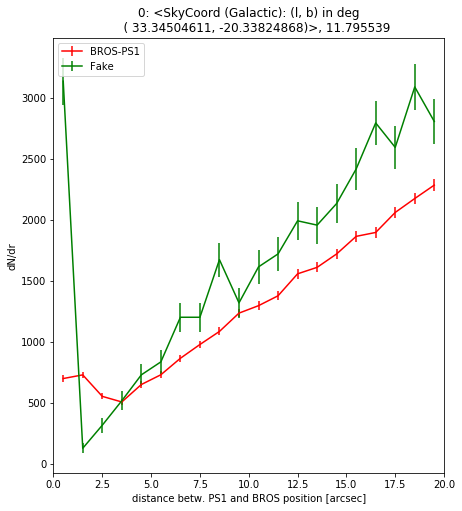

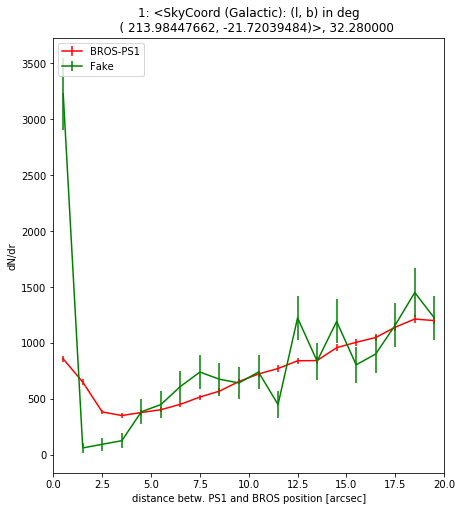

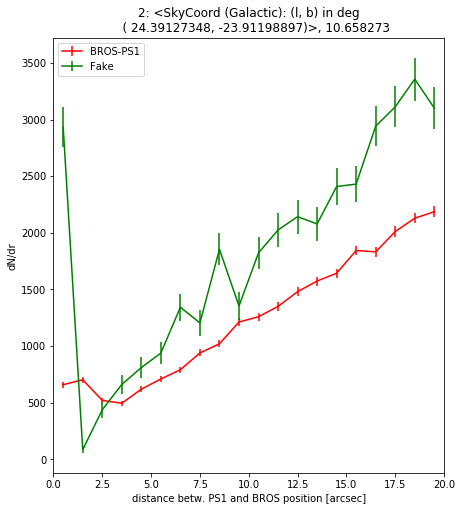

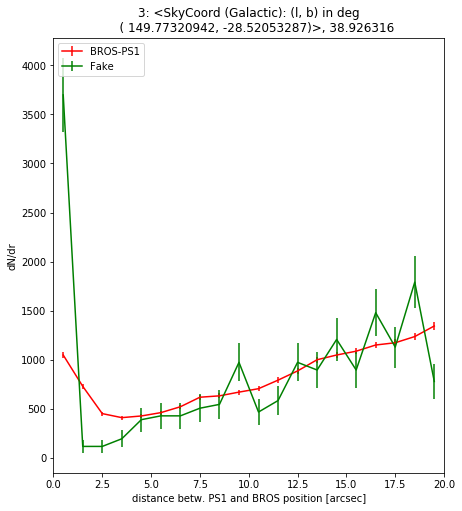

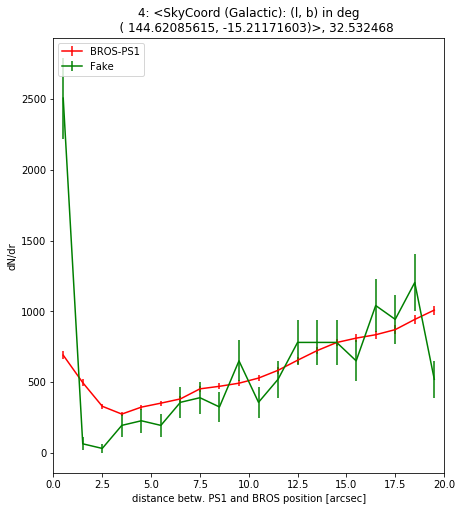

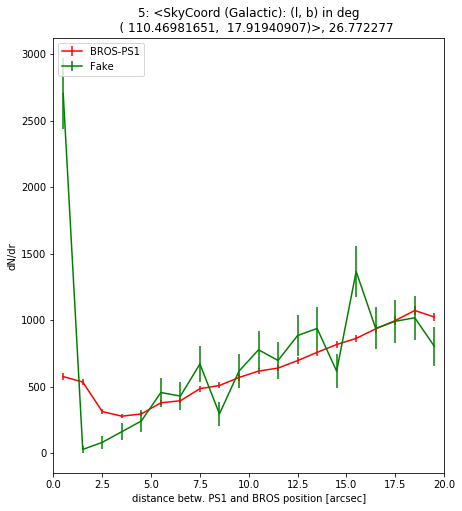

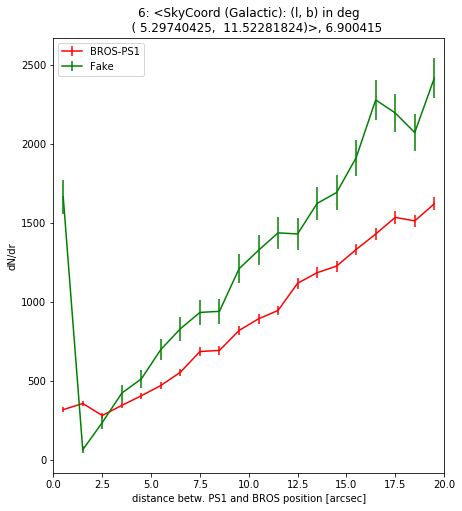

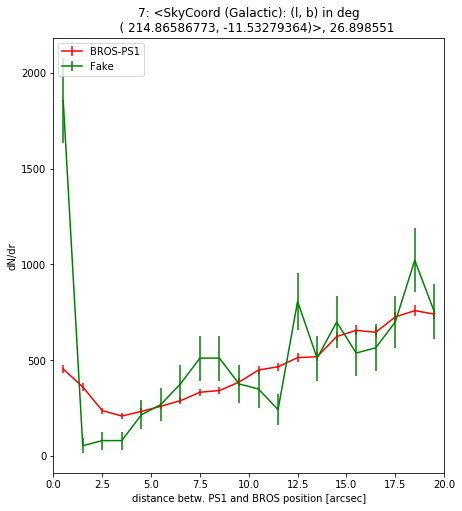

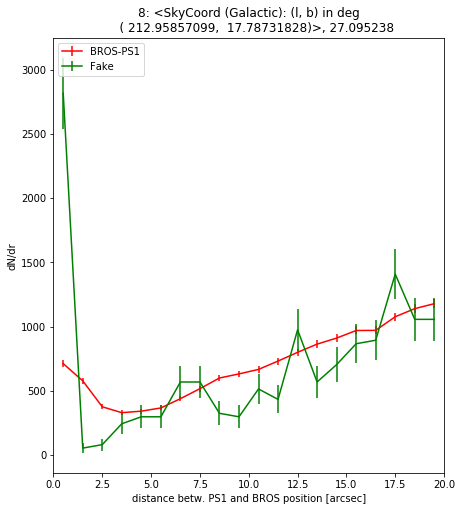

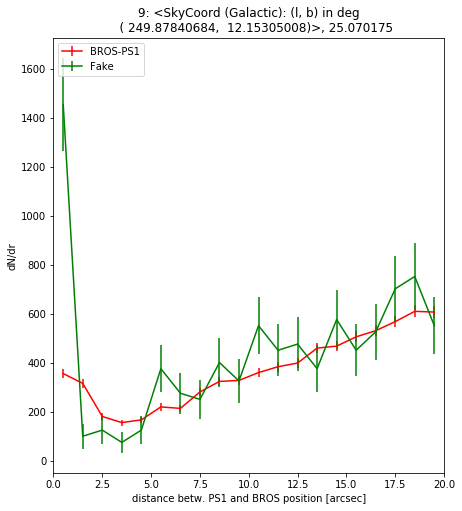

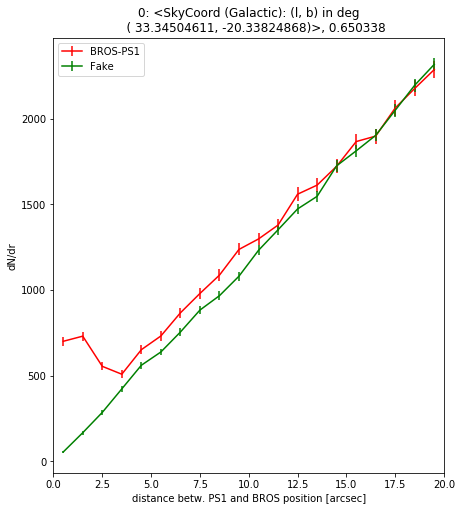

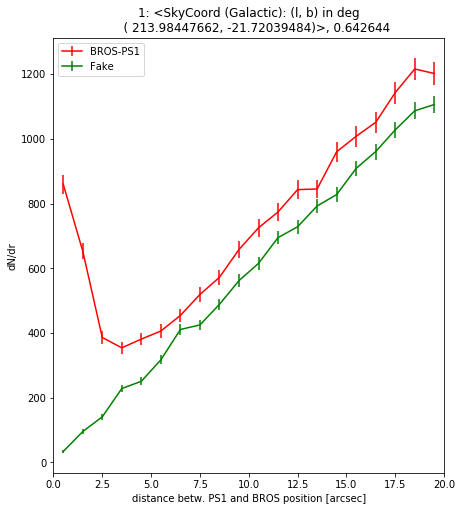

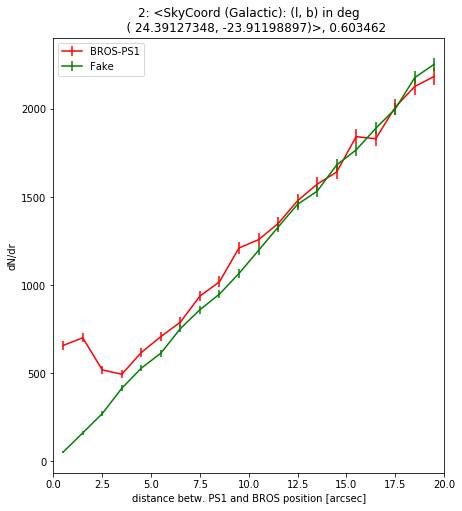

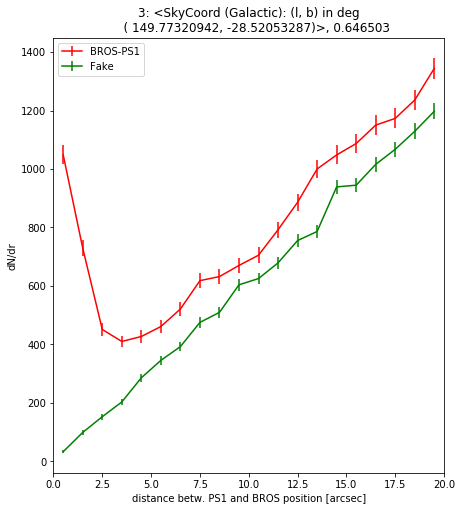

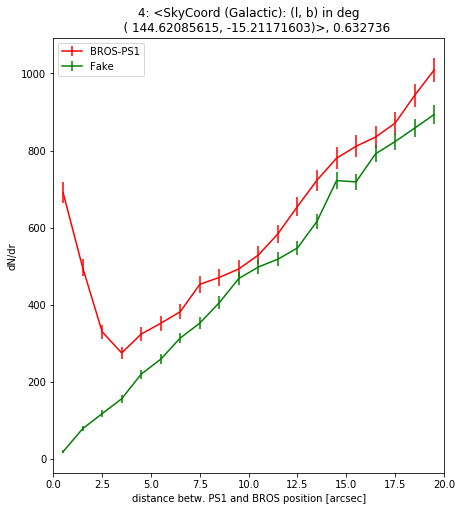

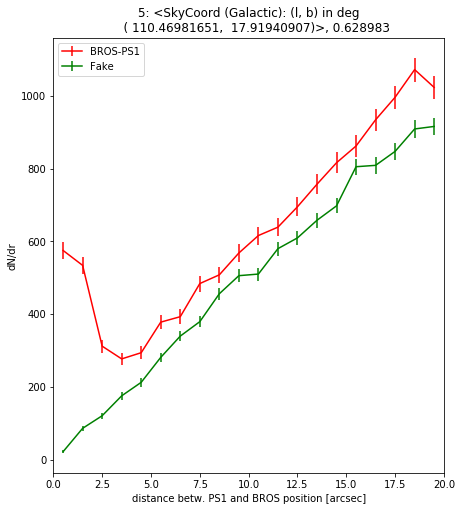

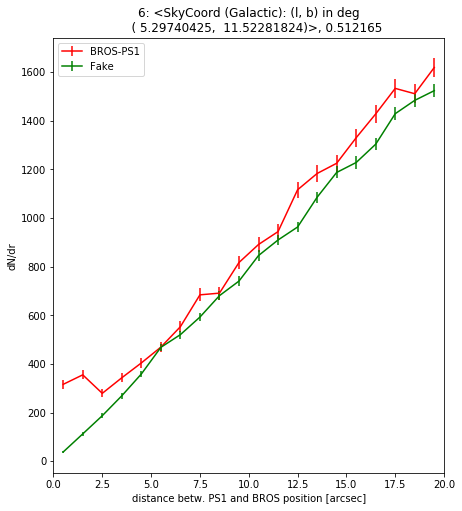

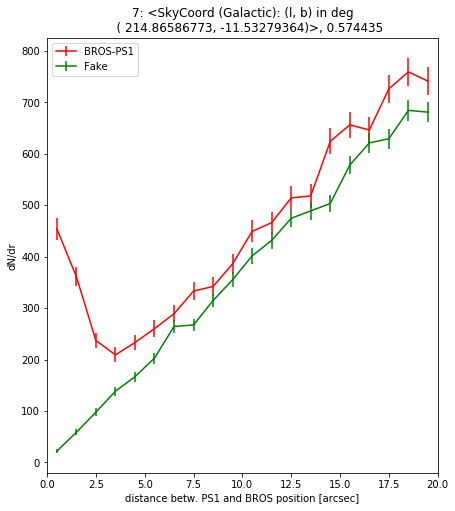

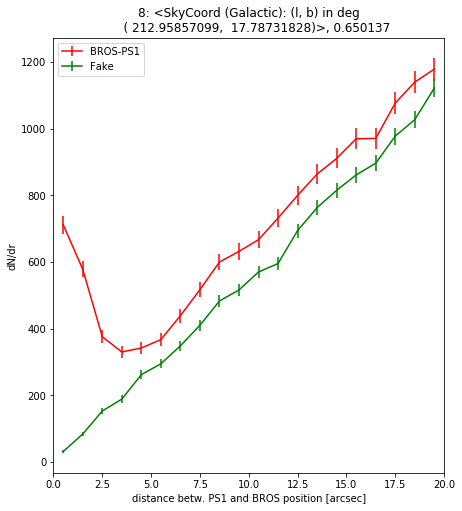

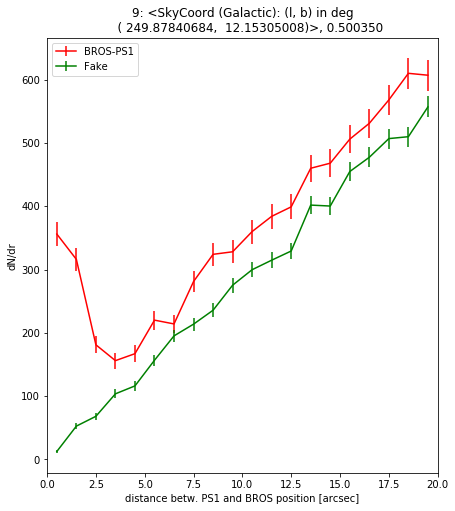

In [10]:
# construct SkyCoord objects to apply a cut in spatial distribution
broscoord = SkyCoord(brostable["ra"],brostable["dec"],unit="deg")
fakecoord = SkyCoord(faketable["ra"],faketable["dec"],unit="deg")
randcoord = SkyCoord(randtable["ra"],randtable["dec"],unit="deg")

separation = 20*u.deg
# take 10 random sources from bros catalogs
randompoints = broscoord[
            (len(broscoord)*numpy.random.rand(10)).astype(numpy.int)
        ]

# make a dN/dr plot for 10 regions
for i, apoint in enumerate(randompoints):
    makehist(
        brostable[ broscoord.separation(apoint)<separation ],
        faketable[ fakecoord.separation(apoint)<separation ],
        "%d: %s" % ( i, apoint.galactic )
    )
    
for i, apoint in enumerate(randompoints):
    makehist(
        brostable[ broscoord.separation(apoint)<separation ],
        randtable[ randcoord.separation(apoint)<separation ],
        "%d: %s" % ( i, apoint.galactic )
    )

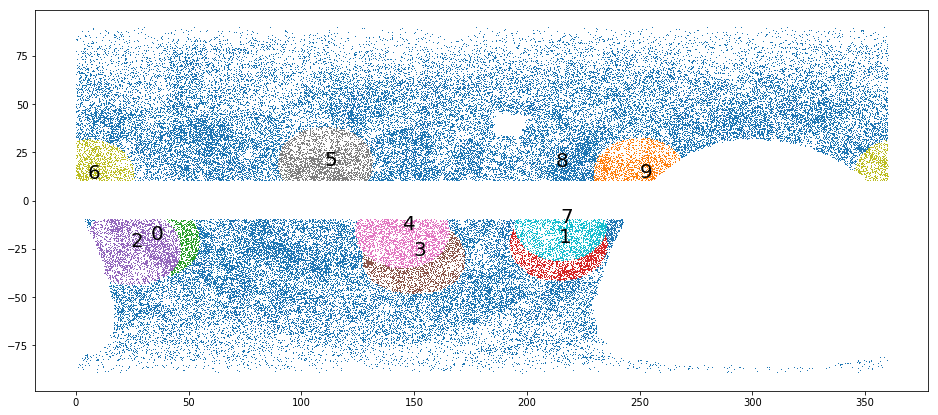

In [11]:
plt.figure(figsize=(16,7))
plt.plot(broscoord.galactic.l.degree,broscoord.galactic.b.degree,",")
plt.plot(randompoints.galactic.l.degree, randompoints.galactic.b.degree,",")
for i, pos in enumerate(randompoints):
    plt.annotate("%d" % (i), ( pos.galactic.l.degree, pos.galactic.b.degree ), fontsize=20 )
    subset = broscoord[broscoord.separation(pos)<separation ]
    plt.plot(subset.galactic.l.degree, subset.galactic.b.degree, ",")

In [12]:
brosgroups = brostable.group_by("id")
fakegroups = faketable.group_by("id")
randgroups = randtable.group_by("id")

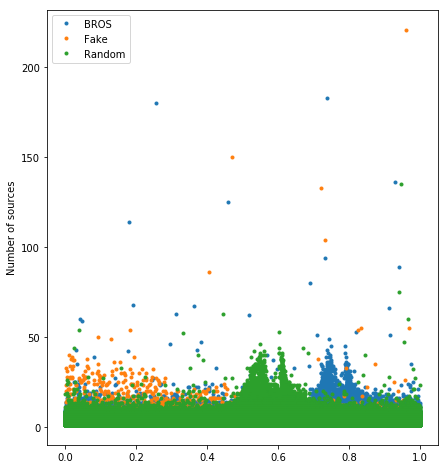

In [13]:
plt.figure(figsize=(7,8))
ax    = plt.axes()
for groups, label in [ 
    ( brosgroups, "BROS"),
    ( fakegroups, "Fake"),
    ( randgroups, "Random")
     ]:    
    diff = numpy.diff(groups.groups.indices)
    N = len(diff)
    plt.plot(numpy.arange(N)/float(N),diff,".",label=label)
ax.set_ylabel("Number of sources")
ax.legend()

Density plot at points where a BROS source exists

/Users/yutsumi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


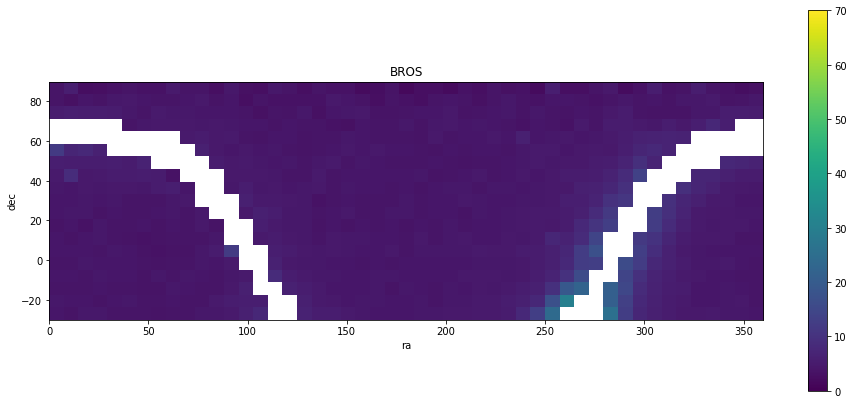

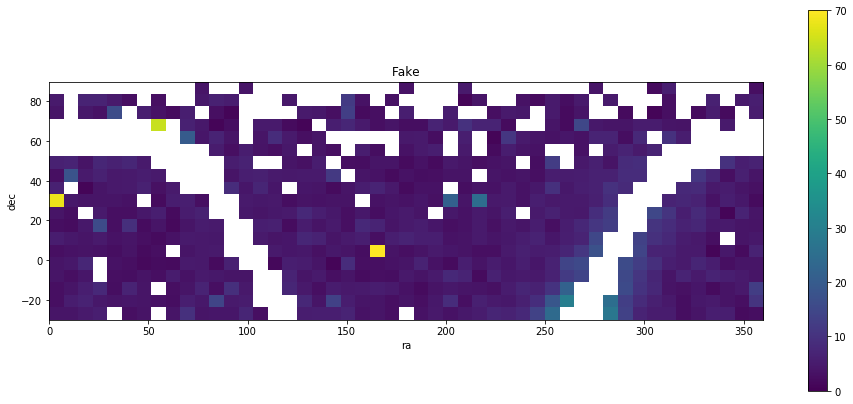

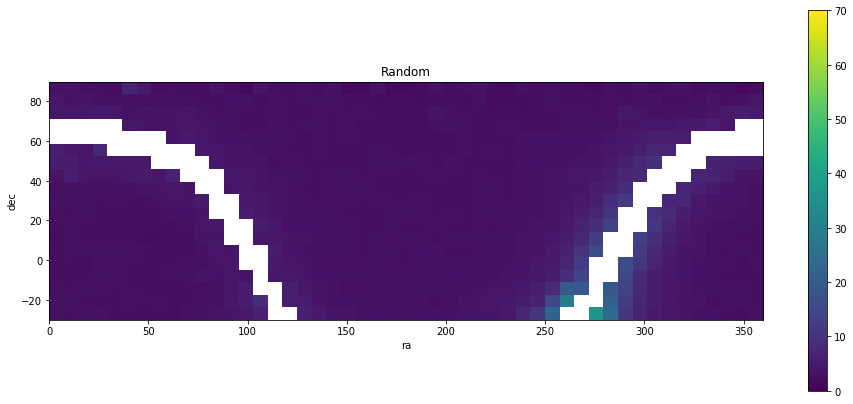

In [14]:

for groups, label in [ 
    ( brosgroups, "BROS"),
    ( fakegroups, "Fake"),
    ( randgroups, "Random")
     ]:    
    ramax, ramin, decmax, decmin = 360, 0, 90, -30
    fig=plt.figure(figsize=(16,7))
    ax    = plt.axes()
    diff = numpy.diff(groups.groups.indices)
    count = hstack( [ groups[groups.groups.indices[:-1]]["ra","dec"], Table([diff],names=["Count"]) ] )
    bins = [numpy.linspace(ramin,ramax,50),numpy.linspace(decmin,decmax,20)]
    H = numpy.histogram2d(count["ra"],count["dec"],bins=bins,weights=count["Count"])
    N = numpy.histogram2d(count["ra"],count["dec"],bins=bins )
    im = ax.imshow((H[0]/N[0]).T,interpolation='nearest', origin='lower', extent=[ramin,ramax,decmin,decmax],
                  vmin=0, vmax=70)
    fig.colorbar(im, ax=ax)
    ax.set_title(label)
    ax.set_ylabel("dec")
    ax.set_xlabel("ra")


Histogram of number counts

Text(0.5,0,'count')

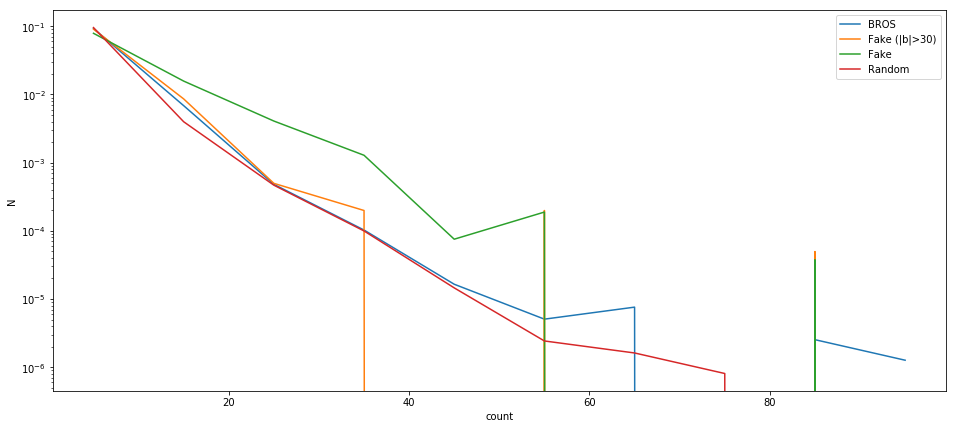

In [15]:
fig=plt.figure(figsize=(16,7))
ax    = plt.axes()

for groups, label in [ 
    ( brosgroups, "BROS"),
    ( (faketable[numpy.abs(fakecoord.galactic.b.degree)>15]).group_by("id"), "Fake (|b|>30)"),
    ( fakegroups, "Fake"),
    ( randgroups, "Random")    
     ]:    
    ramax, ramin, decmax, decmin = 360, 0, 90, -30
    diff = numpy.diff(groups.groups.indices)
    count = hstack( [ groups[groups.groups.indices[:-1]]["ra","dec"], Table([diff],names=["Count"]) ] )
    
    hist, bin_edges = numpy.histogram(count["Count"],bins=10,range=(0,100),normed=True)
    plt.plot((bin_edges[1:]+bin_edges[:-1])*0.5,hist,label=label)

ax.semilogy()
ax.legend()
ax.set_ylabel("N")
ax.set_xlabel("count")

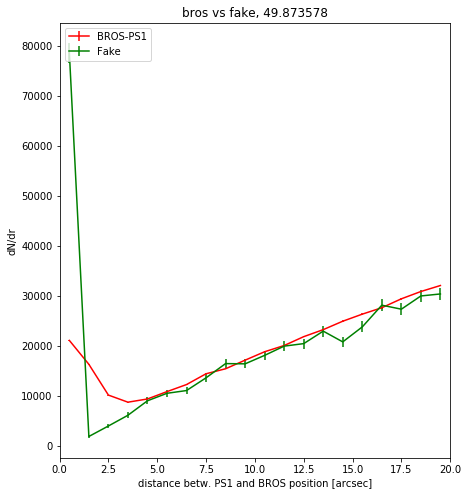

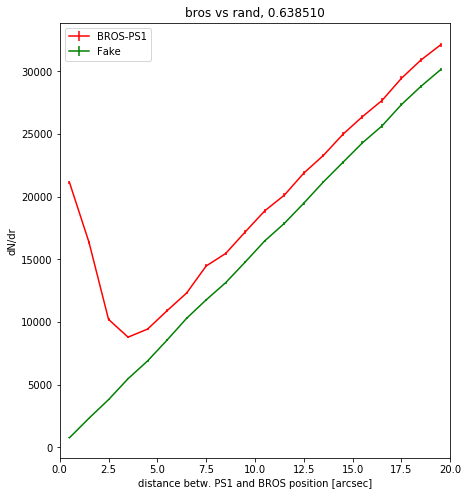

In [16]:
# Again, make dN/dr plot with full sample

makehist( brostable, faketable[numpy.abs(fakecoord.galactic.b.degree)>20], "bros vs fake" )
makehist( brostable, randtable, "bros vs rand" )


Compare the case when numbers of concerened sources are the same

78900
392021 316588
78900


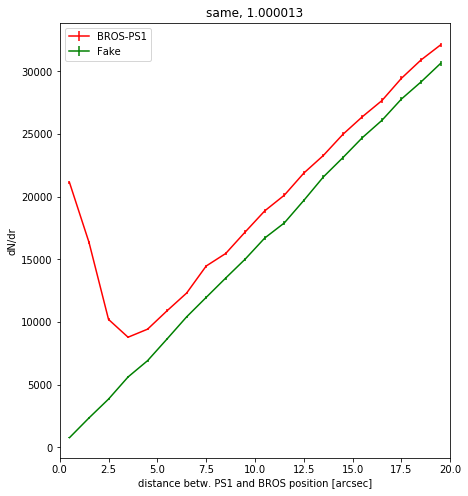

In [17]:
uniquenumber = len(set(list(brostable["id"])))
print uniquenumber
samelengthrand = randgroups[0:randgroups.groups.indices[uniquenumber-1]]
print len(brostable), len(samelengthrand)
print len(samelengthrand.group_by("id").groups.indices)
full = samelengthrand[
    ( samelengthrand["primaryDetection"]==1 )
    & ( samelengthrand[magkey]>magmin )
    & ( samelengthrand[magkey]<magmax )
]
makehist( brostable, samelengthrand , "same" )

In [18]:
diff = numpy.diff(brosgroups.groups.indices)
count = hstack( [ brosgroups[brosgroups.groups.indices[:-1]]["ra","dec"], Table([diff],names=["Count"]) ] )
rcount = hstack( [ randgroups[randgroups.groups.indices[:-1]]["ra","dec"], Table([numpy.diff(randgroups.groups.indices)],names=["Count"]) ] )

Investigate if this deviation happens from normalization issue

In [19]:
# calculate a standard deviation of random sampling from a number of source for a BROS source
arry = []
for i in numpy.arange(1000):
    a=numpy.sum(numpy.random.choice(count["Count"],uniquenumber))
    b=numpy.sum(numpy.random.choice(rcount["Count"],uniquenumber))
    arry.append(float(a-b)/b)
numpy.std(arry)

0.0052512012928972139

/Users/yutsumi/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 0.2625600646448607)

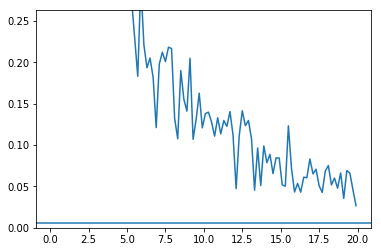

In [20]:
bins  = 100.
range = (0.,20.)
ahist, edges = numpy.histogram( brostable["distance"]*60, bins=bins, range=range)
bhist, edges = numpy.histogram( samelengthrand["distance"]*60, bins=bins, range=range)
plt.plot((edges[1:]+edges[:-1])*0.5,(ahist - bhist).astype(numpy.float)/bhist)
plt.axhline(numpy.std(arry))
ax    = plt.axes()
ax.set_ylim(0,50*numpy.std(arry))


In [21]:
idx,sep2d, dist3d = match_coordinates_sky(broscoord,broscoord,2)

(array([  3.85818000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

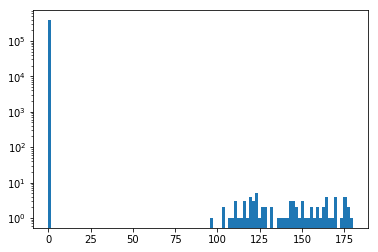

In [22]:
plt.hist(sep2d.arcsec, bins=100,range=(0,60*3),log=True)

sep2d < 4*u.arcsec

In [23]:
brostable

id,ra,dec,objid,distance,primaryDetection,gra,gdec,gPSFMag,gPSFMagErr,gApMag,gApMagErr,gKronMag,gKronMagErr,rra,rdec,rPSFMag,rPSFMagErr,rApMag,rApMagErr,rKronMag,rKronMagErr,ira,idec,iPSFMag,iPSFMagErr,iApMag,iApMagErr,iKronMag,iKronMagErr
str17,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000122473606,0.182931362197,1,0.01218237,-24.47220406,23.8213005066,0.321321994066,23.2070007324,0.0193830002099,-999.0,-999.0,0.01224067,-24.4722379,22.1180000305,0.0904579982162,22.0510005951,0.0113340001553,22.2961006165,0.137631997466,0.01219331,-24.47221944,21.664899826,0.0599029995501,21.0557994843,0.00472400011495,21.0979995728,0.0699720010161
BROS_J0000.0-2428,0.00956051121092,-24.470330036,78630000104582095,0.199966093101,1,0.01035137,-24.47357306,25.4850006104,1.5280200243,24.0104007721,0.0280610006303,-999.0,-999.0,0.01035273,-24.47357463,23.1495990753,0.230409994721,22.5550003052,0.0142940003425,-999.0,-999.0,0.0103625,-24.47355985,21.6208000183,0.0554639995098,20.8586006165,0.00431300001219,20.8642997742,0.0567729994655
BROS_J0000.0+0511,0.01747140177,5.18367127843,114220000177830380,0.0270463452697,1,0.01782517,5.183326,24.5221996307,0.577295005322,25.5259990692,0.0504009984434,-999.0,-999.0,0.01782422,5.1833266,23.8796005249,0.248916998506,22.9179000854,0.0111699998379,-999.0,-999.0,0.01781584,5.18331769,22.5573997498,0.0825830027461,21.9920005798,0.00589099992067,21.9939994812,0.0871910005808
BROS_J0000.1+3055,0.042057464898,30.9331551917,145120000420960439,0.00149491041765,1,0.04209039,30.93318201,20.9146995544,0.0239320006222,20.8262996674,0.00544899981469,20.91340065,0.0331019982696,0.04210061,30.93319217,20.7446994781,0.0170840006322,20.8236999512,0.00480999983847,20.9321994781,0.0266280006617,0.04209586,30.93318664,20.2663993835,0.0140500003472,20.2992992401,0.00358200003393,20.4183998108,0.0226109996438
BROS_J0000.1+3055,0.042057464898,30.9331551917,145120000424664975,0.231254366862,1,0.04250458,30.93695342,22.7493991852,0.137646004558,23.8446998596,0.0218749996275,24.2548007965,0.755065977573,0.04248031,30.93700372,21.8015995026,0.0456800013781,21.8276004791,0.00763700017706,21.9127998352,0.0707660019398,0.04248934,30.93700505,21.4160003662,0.0330840013921,21.3659992218,0.00585399987176,21.4540996552,0.0488950014114
BROS_J0000.2+0821,0.0502209926363,8.36313044601,118030000502116613,0.0181698354478,1,0.05018512,8.36338545,23.4402999878,0.250802010298,23.2399997711,0.0175100006163,-999.0,-999.0,0.05007745,8.36331765,22.9818992615,0.160555005074,22.857000351,0.0105330003425,23.0491008759,0.263536006212,0.05020064,8.36337707,22.9983005524,0.13929399848,23.2826004028,0.0141019998118,23.408700943,0.255450993776
BROS_J0000.2+0821,0.0502209926363,8.36313044601,118030000522140755,0.293015167654,1,0.05219292,8.35866733,22.8355998993,0.122015997767,22.5758991241,0.0128969997168,22.6417007446,0.153540000319,0.05223385,8.35870378,21.886800766,0.0454620011151,21.4783992767,0.00558200012892,21.5851993561,0.0571230016649,0.05223338,8.3587085,21.6651992798,0.0361180007458,21.3313007355,0.00574100017548,21.4386005402,0.0495220012963
BROS_J0000.2+0821,0.0502209926363,8.36313044601,118030000527157619,0.163587841139,1,0.05271465,8.36428903,25.8752002716,2.04779005051,-999.0,0.029077000916,-999.0,-999.0,0.05271824,8.36429003,23.7448997498,0.282909989357,23.0869998932,0.0117100002244,-999.0,-999.0,0.05269642,8.36429132,23.4584999084,0.196742996573,23.3106994629,0.0142850000411,23.2978000641,0.299082010984
BROS_J0000.0-2801,0.00913008442571,-28.0224709357,74370000039597088,0.329823565929,1,0.00395453,-28.01931915,21.2208003998,0.0360819995403,21.2052001953,0.00694599980488,21.3596992493,0.0532499998808,0.00396171,-28.01932369,20.191400528,0.015177000314,20.1735992432,0.00340100005269,20.2569007874,0.0218070000